# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +62.10066104821                   -2.49    6.25s
  2   +56.32094063446        0.76       -1.37   10.4ms
  3   +40.29023099262        1.20       -1.00   49.2ms
  4   +29.78554120869        1.02       -0.84   14.0ms
  5   +23.15008587991        0.82       -0.73   34.0ms
  6   +22.26919760664       -0.06       -0.76   10.5ms
  7   +11.69855270870        1.02       -0.64   14.3ms
  8   +9.264307562420        0.39       -0.62   10.3ms
  9   +8.595964204244       -0.18       -0.65   14.0ms
 10   +8.263265697876       -0.48       -0.61   8.47ms
 11   +7.588043320589       -0.17       -0.70   12.1ms
 12   +7.441386849204       -0.83       -0.73   8.36ms
 13   +7.071370769223       -0.43       -0.66   12.0ms
 14   +6.635881224335       -0.36       -0.65   12.0ms
 15   +6.191951694846       -0.35       -0.71   8.43ms
 16   +5.826689439064       -0.44       -0.80   11.9ms
 17   +5.62

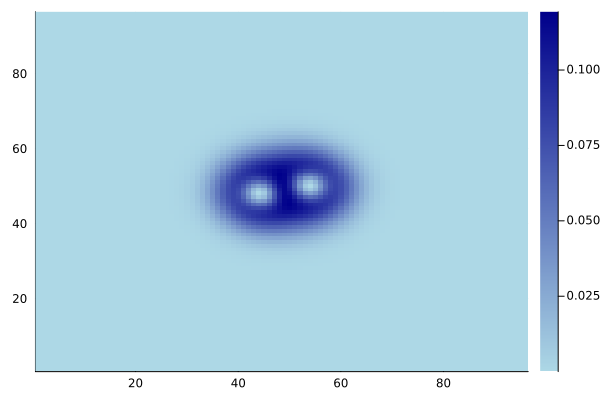

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π) = ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)